# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

/home/luisangel/luis-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Open the CSV files
# Define the pattern to match CSV files
pattern = '../Ha-emitters/*PerField.csv'

# Use glob to find all CSV files in the current directory
csv_files = glob.glob(pattern)

# Create an empty list to store DataFrames
dfs = []

In [3]:
# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,2768.8430,1194.1807,0.000344,1.109519,7.119020e-06,2.708475,...,16.869030,0.045,16.612030,0.040,15.790031,0.034,14.886657,0.028,14.564144,0.031
1,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,1653.6090,3400.8994,0.000307,1.081890,2.490490e-05,2.232373,...,13.345949,0.016,13.265827,0.014,13.113828,0.012,13.033432,0.020,13.019970,0.019
2,b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,3569.1528,3993.6829,0.000317,0.949352,1.283758e-05,2.532320,...,15.504150,0.011,15.336150,0.009,14.717150,0.007,14.074205,0.016,NaN,NaN
3,b'HYDRA-0026',b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,8485.7730,9943.1000,0.000367,1.218677,7.749229e-06,2.742691,...,NaN,NaN,NaN,NaN,15.129318,0.027,NaN,NaN,NaN,NaN
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.4710,0.000384,1.078957,7.585842e-06,2.917582,...,15.852819,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,b'STRIPE82-0157',b'iDR4_3_STRIPE82-0157_0016873',349.808612,-0.962720,7268.3916,3780.7950,0.000391,1.049551,8.169368e-07,3.894912,...,NaN,NaN,NaN,NaN,20.401480,0.137,18.918780,0.100,18.550900,0.059
3660,b'STRIPE82-0158',b'iDR4_3_STRIPE82-0158_0009177',350.254869,0.323001,4347.6445,3032.8470,0.000335,0.986151,6.768905e-07,4.712428,...,19.580069,0.111,19.594069,0.104,19.548069,0.088,18.961864,0.039,19.223470,0.122
3661,b'STRIPE82-0162',b'iDR4_3_STRIPE82-0162_0018498',352.418578,0.670626,8739.1020,5308.4004,0.000349,1.035019,6.068673e-07,3.826304,...,NaN,NaN,NaN,NaN,20.593569,0.147,17.811909,0.155,18.467216,0.062
3662,b'STRIPE82-0163',b'iDR4_3_STRIPE82-0163_0014886',354.578466,-0.927664,3879.0051,4010.2715,0.000404,1.171372,4.901620e-07,4.799046,...,NaN,NaN,NaN,NaN,20.541643,0.192,19.062990,0.052,18.447079,0.067


In [5]:
for columns in combined_df.columns:
    print(columns)

Field
ID
RA
DEC
X
Y
FWHM
FWHM_n
ISOarea
KRON_RADIUS
MU_MAX_INST
PETRO_RADIUS
SEX_FLAGS_DET
SEX_NUMBER_DET
CLASS_STAR
s2n_DET_PStotal
THETA
ELLIPTICITY
ELONGATION
FLUX_RADIUS_20
FLUX_RADIUS_50
FLUX_RADIUS_70
FLUX_RADIUS_90
s2n_r_PStotal
s2n_J0660_PStotal
s2n_i_PStotal
FWHM_r
FWHM_n_r
FWHM_J0660
FWHM_n_J0660
FWHM_i
FWHM_n_i
SEX_FLAGS_r
SEX_FLAGS_J0660
SEX_FLAGS_i
CLASS_STAR_r
CLASS_STAR_J0660
CLASS_STAR_i
r_PStotal
e_r_PStotal
g_PStotal
e_g_PStotal
i_PStotal
e_i_PStotal
u_PStotal
e_u_PStotal
z_PStotal
e_z_PStotal
J0378_PStotal
e_J0378_PStotal
J0395_PStotal
e_J0395_PStotal
J0410_PStotal
e_J0410_PStotal
J0430_PStotal
e_J0430_PStotal
J0515_PStotal
e_J0515_PStotal
J0660_PStotal
e_J0660_PStotal
J0861_PStotal
e_J0861_PStotal
r_psf
e_r_psf
g_psf
e_g_psf
i_psf
e_i_psf
u_psf
e_u_psf
z_psf
e_z_psf
J0378_psf
e_J0378_psf
J0395_psf
e_J0395_psf
J0410_psf
e_J0410_psf
J0430_psf
e_J0430_psf
J0515_psf
e_J0515_psf
J0660_psf
e_J0660_psf
J0861_psf
e_J0861_psf


In [6]:
# Cleaned error

m_err = (combined_df["e_r_PStotal"] <= 0.2) & (combined_df["e_g_PStotal"] <= 0.2) & \
        (combined_df["e_i_PStotal"] <= 0.2) &  \
        (combined_df["e_J0515_PStotal"] <= 0.2) & (combined_df["e_J0660_PStotal"] <= 0.2) & \
        (combined_df["e_J0861_PStotal"] <= 0.2) & (combined_df["e_z_PStotal"] <= 0.2)

m_depth = (combined_df["g_PStotal"] <= 19.6) &  \
        (combined_df["J0515_PStotal"] <= 18.8) & (combined_df["J0861_PStotal"] <= 18.3) & \
        (combined_df["z_PStotal"] <= 18.5)

mask_total = m_err & m_depth

In [7]:
df_cleanErr = combined_df[mask_total]
len(df_cleanErr)

2233

Almeida-Fernandes et al. say that An important conclusion that can be drawn
from this analysis is that for r > 18 mag, an increasing fraction of the
sources is not detected in the blue filters (u, J0378, J0395, J0410, and
J0430). This is an important selection effect that must be considered
by all studies interested in objects in this magnitude range.

In [8]:
#Selecting columns
columns = ["r_PStotal",
"g_PStotal",
"i_PStotal",
"z_PStotal",
"J0515_PStotal",
"J0660_PStotal",
"J0861_PStotal"]

In [9]:
df_mag = df_cleanErr[columns]
df_mag

,r_PStotal,g_PStotal,i_PStotal,z_PStotal,J0515_PStotal,J0660_PStotal,J0861_PStotal
0,15.220734,16.171457,14.812934,14.589712,15.688791,14.816056,14.486720
1,13.060103,13.233669,13.076601,13.112734,13.034685,12.990587,12.979302
2,14.198063,14.808924,14.000414,13.904016,14.653158,14.003431,13.810323
3,14.722768,15.341463,14.474484,14.391745,15.205017,14.518179,14.313604
4,15.091292,15.484464,15.128340,15.073277,15.084617,15.035774,15.058778
...,...,...,...,...,...,...,...
3574,18.597824,18.628359,18.120804,18.046177,18.140083,17.526953,18.111727
3601,18.526375,18.862219,18.465849,18.369356,18.769247,18.071882,18.287401
3624,18.549665,18.602114,18.459835,18.385435,18.537432,18.123035,17.975649
3632,18.628080,18.778920,18.123125,17.957865,18.668146,17.837986,17.675508


### Creating the colors 

In [10]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

21

In [11]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df

In [12]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_1571815/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_1571815/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_1571815/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [13]:
df_colors_mag

,r_PStotal,g_PStotal,i_PStotal,z_PStotal,J0515_PStotal,J0660_PStotal,J0861_PStotal,r_PStotal - g_PStotal,r_PStotal - i_PStotal,r_PStotal - z_PStotal,...,i_PStotal - z_PStotal,i_PStotal - J0515_PStotal,i_PStotal - J0660_PStotal,i_PStotal - J0861_PStotal,z_PStotal - J0515_PStotal,z_PStotal - J0660_PStotal,z_PStotal - J0861_PStotal,J0515_PStotal - J0660_PStotal,J0515_PStotal - J0861_PStotal,J0660_PStotal - J0861_PStotal
0,15.220734,16.171457,14.812934,14.589712,15.688791,14.816056,14.486720,-0.950723,0.407800,0.631022,...,0.223222,-0.875857,-0.003122,0.326214,-1.099079,-0.226344,0.102992,0.872735,1.202071,0.329336
1,13.060103,13.233669,13.076601,13.112734,13.034685,12.990587,12.979302,-0.173566,-0.016498,-0.052631,...,-0.036133,0.041916,0.086014,0.097299,0.078049,0.122147,0.133432,0.044098,0.055383,0.011285
2,14.198063,14.808924,14.000414,13.904016,14.653158,14.003431,13.810323,-0.610861,0.197649,0.294047,...,0.096398,-0.652744,-0.003017,0.190091,-0.749142,-0.099415,0.093693,0.649727,0.842835,0.193108
3,14.722768,15.341463,14.474484,14.391745,15.205017,14.518179,14.313604,-0.618695,0.248284,0.331023,...,0.082739,-0.730533,-0.043695,0.160880,-0.813272,-0.126434,0.078141,0.686838,0.891413,0.204575
4,15.091292,15.484464,15.128340,15.073277,15.084617,15.035774,15.058778,-0.393172,-0.037048,0.018015,...,0.055063,0.043723,0.092566,0.069562,-0.011340,0.037503,0.014499,0.048843,0.025839,-0.023004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,18.597824,18.628359,18.120804,18.046177,18.140083,17.526953,18.111727,-0.030535,0.477020,0.551647,...,0.074627,-0.019279,0.593851,0.009077,-0.093906,0.519224,-0.065550,0.613130,0.028356,-0.584774
3601,18.526375,18.862219,18.465849,18.369356,18.769247,18.071882,18.287401,-0.335844,0.060526,0.157019,...,0.096493,-0.303398,0.393967,0.178448,-0.399891,0.297474,0.081955,0.697365,0.481846,-0.215519
3624,18.549665,18.602114,18.459835,18.385435,18.537432,18.123035,17.975649,-0.052449,0.089830,0.164230,...,0.074400,-0.077597,0.336800,0.484186,-0.151997,0.262400,0.409786,0.414397,0.561783,0.147386
3632,18.628080,18.778920,18.123125,17.957865,18.668146,17.837986,17.675508,-0.150840,0.504955,0.670215,...,0.165260,-0.545021,0.285139,0.447617,-0.710281,0.119879,0.282357,0.830160,0.992638,0.162478


In [14]:
# Drop magniytudes
df_colors = df_colors_mag.drop(columns=columns)

In [15]:
df_colors

,r_PStotal - g_PStotal,r_PStotal - i_PStotal,r_PStotal - z_PStotal,r_PStotal - J0515_PStotal,r_PStotal - J0660_PStotal,r_PStotal - J0861_PStotal,g_PStotal - i_PStotal,g_PStotal - z_PStotal,g_PStotal - J0515_PStotal,g_PStotal - J0660_PStotal,...,i_PStotal - z_PStotal,i_PStotal - J0515_PStotal,i_PStotal - J0660_PStotal,i_PStotal - J0861_PStotal,z_PStotal - J0515_PStotal,z_PStotal - J0660_PStotal,z_PStotal - J0861_PStotal,J0515_PStotal - J0660_PStotal,J0515_PStotal - J0861_PStotal,J0660_PStotal - J0861_PStotal
0,-0.950723,0.407800,0.631022,-0.468057,0.404678,0.734014,1.358523,1.581745,0.482666,1.355401,...,0.223222,-0.875857,-0.003122,0.326214,-1.099079,-0.226344,0.102992,0.872735,1.202071,0.329336
1,-0.173566,-0.016498,-0.052631,0.025418,0.069516,0.080801,0.157068,0.120935,0.198984,0.243082,...,-0.036133,0.041916,0.086014,0.097299,0.078049,0.122147,0.133432,0.044098,0.055383,0.011285
2,-0.610861,0.197649,0.294047,-0.455095,0.194632,0.387740,0.808510,0.904908,0.155766,0.805493,...,0.096398,-0.652744,-0.003017,0.190091,-0.749142,-0.099415,0.093693,0.649727,0.842835,0.193108
3,-0.618695,0.248284,0.331023,-0.482249,0.204589,0.409164,0.866979,0.949718,0.136446,0.823284,...,0.082739,-0.730533,-0.043695,0.160880,-0.813272,-0.126434,0.078141,0.686838,0.891413,0.204575
4,-0.393172,-0.037048,0.018015,0.006675,0.055518,0.032514,0.356124,0.411187,0.399847,0.448690,...,0.055063,0.043723,0.092566,0.069562,-0.011340,0.037503,0.014499,0.048843,0.025839,-0.023004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,-0.030535,0.477020,0.551647,0.457741,1.070871,0.486097,0.507555,0.582182,0.488276,1.101406,...,0.074627,-0.019279,0.593851,0.009077,-0.093906,0.519224,-0.065550,0.613130,0.028356,-0.584774
3601,-0.335844,0.060526,0.157019,-0.242872,0.454493,0.238974,0.396370,0.492863,0.092972,0.790337,...,0.096493,-0.303398,0.393967,0.178448,-0.399891,0.297474,0.081955,0.697365,0.481846,-0.215519
3624,-0.052449,0.089830,0.164230,0.012233,0.426630,0.574016,0.142279,0.216679,0.064682,0.479079,...,0.074400,-0.077597,0.336800,0.484186,-0.151997,0.262400,0.409786,0.414397,0.561783,0.147386
3632,-0.150840,0.504955,0.670215,-0.040066,0.790094,0.952572,0.655795,0.821055,0.110774,0.940934,...,0.165260,-0.545021,0.285139,0.447617,-0.710281,0.119879,0.282357,0.830160,0.992638,0.162478


# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [16]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [17]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [18]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]

best_num_components = None
best_silhouette_score = -1  # Initialize with a low value

In [19]:
# Loop over different numbers of components
for num_components in num_components_range:
    # Fit UMAP model
    reducer_ = umap.UMAP(n_neighbors=100, n_components=num_components, random_state=42)
    X_train_trans = reducer_.fit_transform(X_train)
    
    # Cluster the transformed data using KMeans
    kmeans = KMeans(n_clusters=num_components, random_state=42)
    labels = kmeans.fit_predict(X_train_trans)
    
    # Evaluate performance on validation set using Silhouette Score
    silhouette = silhouette_score(X_train_trans, labels, random_state=42)
    print(f"Number of components: {num_components}, Silhouette Score: {silhouette}")
    
    # Update best number of components and labels if necessary
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_num_components = num_components
        best_labels = labels

Number of components: 2, Silhouette Score: 0.48513439297676086
Number of components: 3, Silhouette Score: 0.38387995958328247
Number of components: 4, Silhouette Score: 0.39574533700942993
Number of components: 5, Silhouette Score: 0.39066579937934875
Number of components: 10, Silhouette Score: 0.428474098443985
Number of components: 20, Silhouette Score: 0.42885124683380127
Number of components: 50, Silhouette Score: 0.4053100049495697


In [20]:
# After the loop, you'll have the best number of components and corresponding labels
print(f"Best number of components: {best_num_components}, Best Silhouette Score: {best_silhouette_score}")


Best number of components: 2, Best Silhouette Score: 0.48513439297676086


#### Try UMAP

In [21]:
num_components = 2
reducer = umap.UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

Visualize the cumulative explained variance ratio:

In [22]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

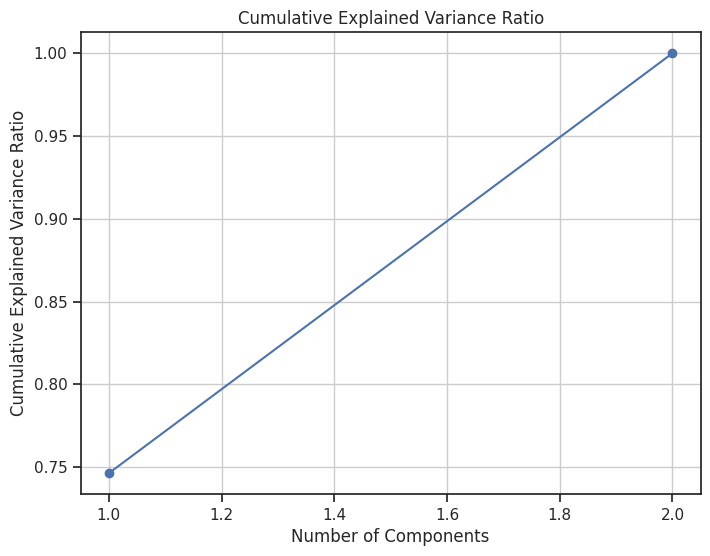

In [23]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [24]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2
0,9.238462,8.649637
1,15.569648,9.138871
2,11.140429,9.775970
3,10.928853,9.910278
4,13.178800,7.737431
...,...,...
2228,13.423965,10.656140
2229,14.431475,11.032812
2230,13.886474,8.103130
2231,10.624641,8.863799


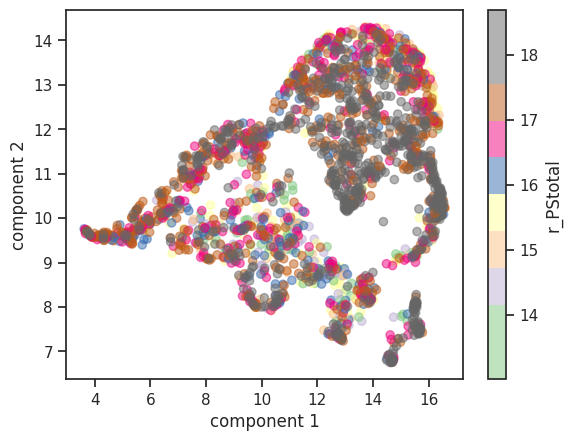

In [25]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_cleanErr["r_PStotal"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [26]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [27]:
best_score = -1
best_params = {}


In [28]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [29]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 10, 'min_cluster_size': 120}
Best silhouette score: 0.36798233


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 10 and 'min_cluster_size': 120. 

In [30]:
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=120, prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [31]:

clusterer.fit(X_trans)
labels = clusterer.labels_

In [32]:
clusterer.metric

'euclidean'

In [33]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_noise_ = list(labels).count(-1)


In [34]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of cluster points 0: 1039
Estimated number of cluster points 1: 1088
Estimated number of cluster points 2: 0
Estimated number of cluster points 3: 0
Estimated number of noise points: 106


<AxesSubplot: >

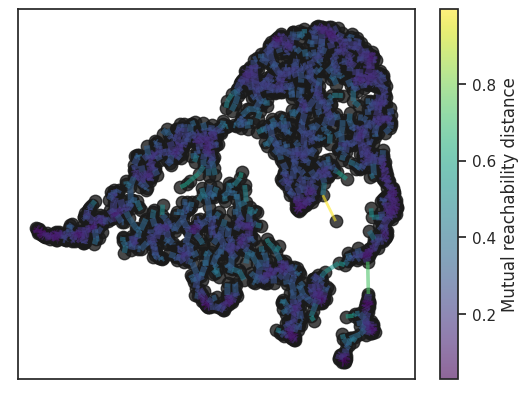

In [35]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<AxesSubplot: ylabel='distance'>

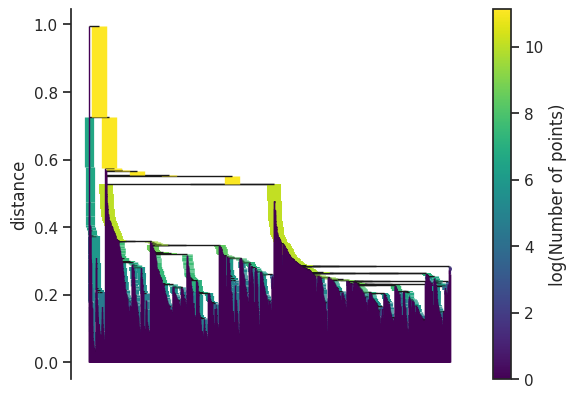

In [36]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<AxesSubplot: ylabel='$\\lambda$ value'>

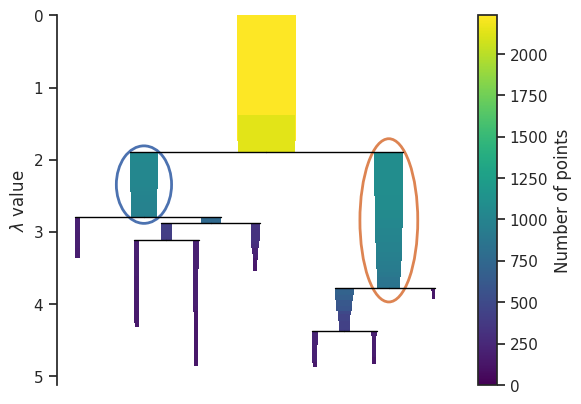

In [37]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

/home/luisangel/luis-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

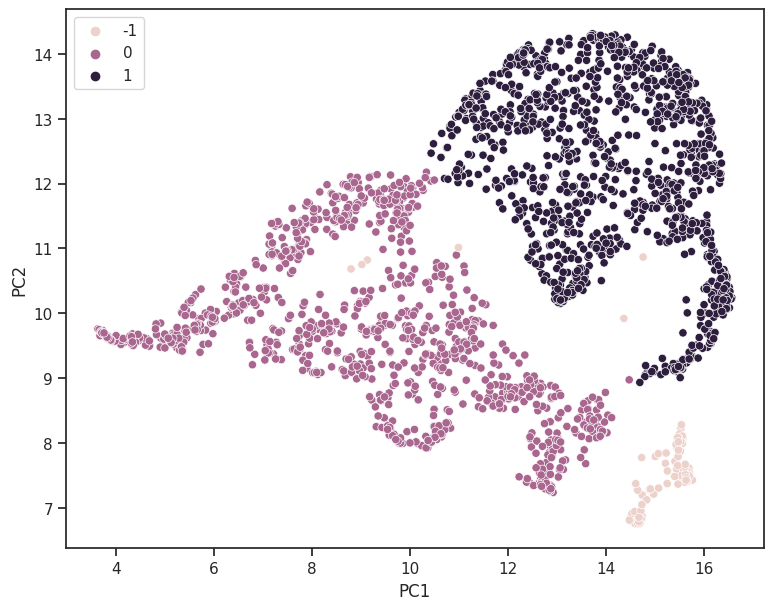

In [38]:
plt.figure(figsize=(9,7))
sns.scatterplot(umap_df["PC1"], umap_df["PC2"], 
                hue=labels,
                )

Create the tables for each clase

In [39]:
df_cleanErr["Label"] = labels

/tmp/ipykernel_1571815/341984377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanErr["Label"] = labels


In [40]:
df_cleanErr

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,2768.8430,1194.1807,0.000344,1.109519,7.119020e-06,2.708475,...,0.045,16.612030,0.040,15.790031,0.034,14.886657,0.028,14.564144,0.031,0
1,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,1653.6090,3400.8994,0.000307,1.081890,2.490490e-05,2.232373,...,0.016,13.265827,0.014,13.113828,0.012,13.033432,0.020,13.019970,0.019,1
2,b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,3569.1528,3993.6829,0.000317,0.949352,1.283758e-05,2.532320,...,0.011,15.336150,0.009,14.717150,0.007,14.074205,0.016,NaN,NaN,0
3,b'HYDRA-0026',b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,8485.7730,9943.1000,0.000367,1.218677,7.749229e-06,2.742691,...,NaN,NaN,NaN,15.129318,0.027,NaN,NaN,NaN,NaN,0
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.4710,0.000384,1.078957,7.585842e-06,2.917582,...,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,b'STRIPE82-0092',b'iDR4_3_STRIPE82-0092_0073091',302.767060,0.921949,9034.8920,6953.5300,0.000334,1.081220,6.068673e-07,3.812257,...,0.061,18.213297,0.060,18.144297,0.048,17.527199,0.031,18.166435,0.068,1
3601,b'STRIPE82-0099',b'iDR4_3_STRIPE82-0099_0078378',308.756135,-0.329535,6942.1050,7925.3813,0.000357,1.049517,1.097029e-06,3.824184,...,0.036,18.698038,0.032,18.825039,0.033,18.117783,0.017,18.366005,0.043,1
3624,b'STRIPE82-0108',b'iDR4_3_STRIPE82-0108_0035778',315.058785,0.746094,2796.6475,5802.3330,0.000399,1.053732,1.097029e-06,4.165836,...,0.065,18.632954,0.064,18.597954,0.050,18.253670,0.029,NaN,NaN,0
3632,b'STRIPE82-0117',b'iDR4_3_STRIPE82-0117_0001211',321.727257,-1.348360,5533.3926,1256.5071,0.000347,0.936897,7.935957e-07,3.546529,...,0.060,18.616020,0.060,18.704021,0.048,17.887342,0.025,17.713423,0.044,0


In [41]:
mask_0 = df_cleanErr["Label"] == 0
df_cleanErr_0 = df_cleanErr[mask_0]
df_cleanErr_0

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,2768.8430,1194.1807,0.000344,1.109519,7.119020e-06,2.708475,...,0.045,16.612030,0.040,15.790031,0.034,14.886657,0.028,14.564144,0.031,0
2,b'HYDRA-0023',b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,3569.1528,3993.6829,0.000317,0.949352,1.283758e-05,2.532320,...,0.011,15.336150,0.009,14.717150,0.007,14.074205,0.016,NaN,NaN,0
3,b'HYDRA-0026',b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,8485.7730,9943.1000,0.000367,1.218677,7.749229e-06,2.742691,...,NaN,NaN,NaN,15.129318,0.027,NaN,NaN,NaN,NaN,0
4,b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,9368.1560,5633.4710,0.000384,1.078957,7.585842e-06,2.917582,...,0.022,15.775820,0.015,15.204820,0.023,15.071949,0.020,15.141534,0.030,0
5,b'HYDRA-0033',b'iDR4_3_HYDRA-0033_0017375',154.580768,-27.094394,6409.9900,2850.9350,0.000353,1.032051,2.392458e-05,2.396384,...,NaN,14.363116,0.012,NaN,NaN,NaN,NaN,13.312773,0.019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,b'SPLUS-n02n18',b'iDR4_3_SPLUS-n02n18_0037138',174.342404,1.816372,2519.6567,8492.6600,0.000480,1.080214,1.353781e-06,4.276761,...,0.066,18.719261,0.058,18.614262,0.051,18.115562,0.029,17.971937,0.053,0
3097,b'SPLUS-n16s10',b'iDR4_3_SPLUS-n16s10_0035283',163.428928,-19.708004,10005.7980,8990.4270,0.000426,1.039641,1.213735e-06,4.069621,...,0.083,19.177480,0.084,18.892480,0.054,18.322521,0.025,18.297800,0.054,0
3525,b'STRIPE82-0086',b'iDR4_3_STRIPE82-0086_0010188',60.034312,0.497069,2183.5886,4172.3433,0.000448,0.958259,1.097029e-06,4.408161,...,0.064,18.783749,0.061,18.510748,0.043,18.257387,0.028,18.138012,0.049,0
3624,b'STRIPE82-0108',b'iDR4_3_STRIPE82-0108_0035778',315.058785,0.746094,2796.6475,5802.3330,0.000399,1.053732,1.097029e-06,4.165836,...,0.065,18.632954,0.064,18.597954,0.050,18.253670,0.029,NaN,NaN,0


In [42]:
# Gropu 1
mask_1 = df_cleanErr["Label"] == 1
df_cleanErr_1 = df_cleanErr[mask_1]
df_cleanErr_1

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
1,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,1653.6090,3400.8994,0.000307,1.081890,2.490490e-05,2.232373,...,0.016,13.265827,0.014,13.113828,0.012,13.033432,0.020,13.019970,0.019,1
6,b'HYDRA-0036',b'iDR4_3_HYDRA-0036_0040710',159.647368,-26.335164,4481.6245,7820.3936,0.000301,1.018796,3.267747e-06,3.029539,...,0.035,16.853857,0.029,16.287857,0.022,15.831639,0.032,15.777005,0.020,1
9,b'HYDRA-0040',b'iDR4_3_HYDRA-0040_0031328',151.483829,-28.154827,4597.9480,4992.2530,0.000350,1.016878,2.420467e-05,2.632255,...,0.010,14.126691,0.009,13.673691,0.009,13.366109,0.015,13.272833,0.023,1
13,b'HYDRA-0046',b'iDR4_3_HYDRA-0046_0004504',161.640075,-28.700425,1164.7158,1407.7684,0.000335,0.891136,6.558835e-06,2.864985,...,0.024,16.963417,0.024,16.327417,0.017,15.727429,0.023,15.612148,0.023,1
18,b'HYDRA-0052',b'iDR4_3_HYDRA-0052_0024458',154.940227,-29.726918,5712.8070,3774.1490,0.000352,1.081605,8.776235e-06,2.760342,...,0.019,15.921910,0.013,15.373910,0.012,14.981318,0.015,14.915997,0.034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,b'HYDRA-0043',b'iDR4_3_HYDRA-0043_0041022',155.369217,-27.806720,9767.5310,7258.5660,0.000386,1.057232,1.237076e-06,4.152157,...,0.068,19.290054,0.066,18.812054,0.047,18.219110,0.412,18.291632,0.074,1
2716,b'HYDRA-0097',b'iDR4_3_HYDRA-0097_0053483',154.424746,-36.013941,7395.2340,7778.0933,0.000538,0.990605,1.633874e-06,4.334745,...,0.098,19.183222,0.091,18.827220,0.054,18.109820,0.050,18.341644,0.066,1
2830,b'HYDRA-0147',b'iDR4_3_HYDRA-0147_0141055',154.989341,-43.932840,7482.7344,9646.1430,0.000351,0.960951,8.402778e-07,4.098135,...,0.134,19.342823,0.105,18.827824,0.054,18.417692,0.066,18.363360,0.057,1
3574,b'STRIPE82-0092',b'iDR4_3_STRIPE82-0092_0073091',302.767060,0.921949,9034.8920,6953.5300,0.000334,1.081220,6.068673e-07,3.812257,...,0.061,18.213297,0.060,18.144297,0.048,17.527199,0.031,18.166435,0.068,1


In [43]:
# Gropu 1
mask_noise = df_cleanErr["Label"] == -1
df_cleanErr_noise = df_cleanErr[mask_noise]
df_cleanErr_noise

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,Label
24,b'HYDRA-0057',b'iDR4_3_HYDRA-0057_0010037',163.709704,-29.982762,1756.2247,2088.7000,0.000405,1.146123,0.000032,2.558305,...,0.013,13.868418,0.013,13.451418,0.012,13.182868,0.009,13.050088,0.011,-1
29,b'HYDRA-0057',b'iDR4_3_HYDRA-0057_0033628',163.711722,-29.482507,1726.1638,5363.2380,0.000394,1.114804,0.000030,2.651955,...,0.014,13.907890,0.015,13.524890,0.013,13.291015,0.007,13.166406,0.012,-1
67,b'HYDRA-0091',b'iDR4_3_HYDRA-0091_0032855',159.655571,-35.108847,4285.0050,4700.0854,0.000344,0.960049,0.000010,2.717169,...,0.017,16.403362,0.017,15.378362,0.011,14.639351,0.025,14.260328,0.016,-1
279,b'SPLUS-n18s07',b'iDR4_3_SPLUS-n18s07_0009232',159.406643,-23.376123,6134.6990,2495.8389,0.000347,0.969142,0.000017,0.000000,...,0.091,18.122290,0.065,17.066288,0.023,15.600875,0.016,14.840506,0.025,-1
349,b'SPLUS-s25s47',b'iDR4_3_SPLUS-s25s47_0030687',73.330458,-31.532513,5187.3770,10047.8900,0.000364,1.089159,0.000020,2.367494,...,0.009,13.974276,0.008,13.687276,0.014,13.293928,0.009,13.241838,0.010,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,b'STRIPE82-0104',b'iDR4_3_STRIPE82-0104_0024369',311.608789,0.393830,6824.2120,3496.4731,0.000348,0.986415,0.000001,3.682252,...,0.077,19.046480,0.066,18.510480,0.040,17.342780,0.018,16.611900,0.029,-1
2606,b'STRIPE82-0131',b'iDR4_3_STRIPE82-0131_0012514',332.216546,-1.101021,1815.8654,2875.2446,0.000358,1.001286,0.000002,3.783869,...,0.048,18.357798,0.040,18.368797,0.033,17.843372,0.022,17.846733,0.037,-1
2624,b'STRIPE82-0158',b'iDR4_3_STRIPE82-0158_0002490',349.427521,0.093123,9763.4440,1528.1051,0.000368,1.082996,0.000002,4.099050,...,0.050,17.935234,0.046,18.010233,0.041,17.522295,0.025,16.980566,0.033,-1
3227,b'SPLUS-s23s18',b'iDR4_3_SPLUS-s23s18_0011432',25.764560,-29.881884,8989.5050,3487.0110,0.000452,1.046826,0.000001,3.585177,...,0.055,17.988031,0.038,18.765032,0.038,18.173386,0.021,18.200558,0.043,-1


In [44]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr.groupby("Label")

In [45]:
# Define the directory where you want to save the CSV files
directory = '../Class_depth_dropbluef/'

In [46]:

# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_redf_noise.csv'
    else:
        filename = f'Halpha_emitter_redf_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)